Universidad de los Andes
============

Punto 1 - Componentes principales
---------------------------------
_________________________________

Utilizando el conjunto de datos "airquality" del paquete "datasets", construya la matriz de datos X usando las primeras cuatro variables: nivel de ozono, radiación solar, viento y temperatura.
Información de los datos puede ser consultada ?airquality. (Use na.omit)

In [66]:
library(datasets)
data("airquality")
air=na.omit(airquality[,1:4])
head(air)
n=nrow(air)

,Ozone,Solar.R,Wind,Temp
1,41,190,7.4,67
2,36,118,8.0,72
3,12,149,12.6,74
4,18,313,11.5,62
7,23,299,8.6,65
8,19,99,13.8,59


1.1 Componentes principales - matriz de covarianzas
------
Suponga que se le pide construir un índice de severidad de clima  para el mes de mayo usando estas cuatro variables.  Encuentre la primera componente principal (con la matriz de varianza)  e interprétela.
<br>
<br>
Se construye la matriz de covarianza teniendo en cuenta solo las 4 variables indicadas:

In [71]:
# Matriz de covarianza
S=round(var(air),1)
S

,Ozone,Solar.R,Wind,Temp
Ozone,1107.3,1056.6,-72.5,221.5
Solar.R,1056.6,8308.7,-41.2,255.5
Wind,-72.5,-41.2,12.7,-16.9
Temp,221.5,255.5,-16.9,90.8


El valor y vector propio del primer componente, basados esta matriz, se muestra a continuación:

In [72]:
w=eigen(S)$vectors[,1]; as.data.frame(w, row.names=rownames(S))
lambda=eigen(S)$values[1]; as.data.frame(lambda, row.names="1er componente")


,w
Ozone,-0.14301748
Solar.R,-0.98911878
Wind,0.00611202
Temp,-0.03395128


,lambda
1er componente,8470.499


El primer componente esta relacionado principalmente con el nivel de radiación solar registrado para cada día y en menor medida con el nivel medio de ozono en partes por billón, las otras dos variables no se explican con este componente. Podemos observar mejor los resultados de este análisis empleando la función $princomp$, con la que se obtiene:

In [47]:
pca1=princomp(air, cor=F)
summary(pca1, loadings=T)

Importance of components:
                           Comp.1     Comp.2     Comp.3       Comp.4
Standard deviation     91.6199928 31.4294916 6.64592630 2.7466704766
Proportion of Variance  0.8898078  0.1047105 0.00468195 0.0007997032
Cumulative Proportion   0.8898078  0.9945183 0.99920030 1.0000000000

Loadings:
        Comp.1 Comp.2 Comp.3 Comp.4
Ozone    0.143  0.967 -0.203       
Solar.R  0.989 -0.147              
Wind                          0.996
Temp            0.196  0.978       

El primer componente explica el 88.98% de la varianza, que es un porcentaje muy alto. Por lo tanto resume adecuadamente la iinformación de las cuatro variables.

### 1.2  Biplot
<br>

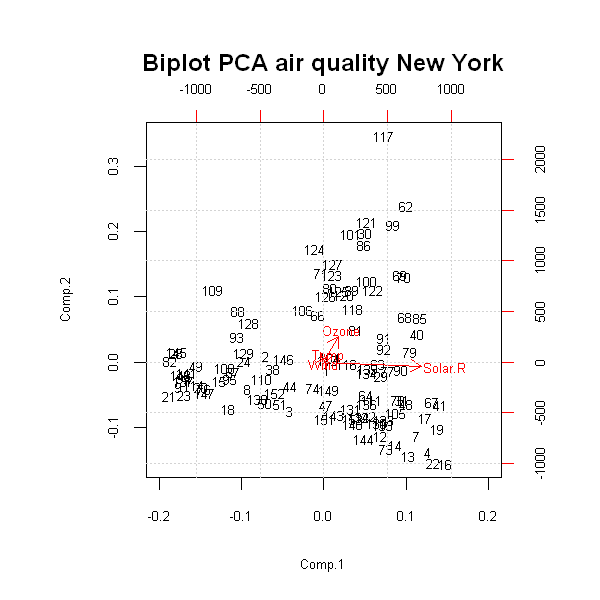

In [53]:
library(repr)
options(repr.plot.width=5, repr.plot.height=5, repr.plot.bg="grey")
biplot(pca1, xlim=c(-0.2,0.2), cex=0.65, cex.axis=0.65, cex.lab=0.65,
      main="Biplot PCA air quality New York")
grid()

El biplot deja ver la relación directa entre la radiación solar *'Solar.R'* con el primer componente, por otro lado el ángulo de la variable nivel de ozono *'Ozone'* indica que tiene mas relación con el segundo componente y que las otras dos variables no influyen para detemrinar la calidad del aire, medida por las cuatro variables seleccionadas.

### 1.3 Componentes principales - matriz de correlaciones
Encuentre las componentes principales usando la matriz de correlaciones. Cuál matriz se debe usar para construir el índice, ***S(varianzas)*** o ***R(correlaciones)***?
<br>
<br>
La matriz de correlaciones para las cuatro variables es la siguiente:

In [62]:
library(corrplot)
R=cor(air)
as.data.frame(R)

,Ozone,Solar.R,Wind,Temp
Ozone,1.0000000,0.3483417,-0.6124966,0.6985414
Solar.R,0.3483417,1.0000000,-0.1271835,0.2940876
Wind,-0.6124966,-0.1271835,1.0000000,-0.4971897
Temp,0.6985414,0.2940876,-0.4971897,1.0000000


Ahora se conforman los componentes principales con esta matriz, con lo que se obtienen los siguientes resultados:

In [67]:
pca2=princomp(air, cor=T)
summary(pca2, loadings=T)

Importance of components:
                          Comp.1    Comp.2    Comp.3    Comp.4
Standard deviation     1.5361961 0.9458733 0.6897463 0.5193026
Proportion of Variance 0.5899747 0.2236691 0.1189375 0.0674188
Cumulative Proportion  0.5899747 0.8136437 0.9325812 1.0000000

Loadings:
        Comp.1 Comp.2 Comp.3 Comp.4
Ozone   -0.589         0.115  0.797
Solar.R -0.317 -0.898 -0.278 -0.123
Wind     0.497 -0.430  0.691  0.302
Temp    -0.553         0.658 -0.508

Para este caso la proporción de varianza explicada por el primer componente es del 59% y nos indica que el ozono, la radiación solar y la temperatura están relacionadas directamente, mientras que el viento es inverso a estas tres variables. Un valor alto en el primer componente implica que el ozono, la radiación solar y la temperatura presentan bajos niveles,por otro lado el viento presenta alta velocidad.

Como se quiere resumir la información a una sola variable, se tiene en cuenta solo el primer componente. Por lo tanto, para este caso es preferible implementar el análisis de componentes principales con la **matriz de varianzas y covarianzas**, pues la proporción de varianza que explica el primer componente es mayor:

$$ PV_S = 89\% > PV_R = 59\% $$